<a href="https://colab.research.google.com/github/VibroGuard/Visualize-Data/blob/main/Visualize-Basics/Visualize_Vibration_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualize Vibration Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pre_process_data(data):
    """
    [x,y,z], [x,y,z], [x,y,z] to [x,x,x] [y,y,y] [z,z,z] format
    This function processes the data and returns the x, y, z values of the data
    :param data:
    :return: for given data set it returns x, y, z values separately
    """
    x_ = data[:, 0]
    y_ = data[:, 1]
    z_ = data[:, 2]
    return x_, y_, z_

In [3]:
def fft_data(data):
    """
    This function takes the data and returns the fft of the data
    :param data:
    :return: fft of the data (x+iy) and absolute value of the fft (magnitude of the fft)
    """
    fft_result = np.fft.fft(data)
    return fft_result.tolist(), np.abs(fft_result).tolist()

In [4]:
def visualize_data(x, y, z, sps, plot_type):
    """
    This function visualizes the data in x, y, z directions with respect to time
    :param x:
    :param y:
    :param z:
    :param sps samples per second:
    :return: plots the data
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    names = ["x - axis", "y - axis", "z - axis"]
    for i, ax in enumerate(axs):
        data = [x, y, z][i]
        if plot_type == "time":
          time = len(data) / sps  # time = number of samples / samples per second
          horizontal_axis = np.linspace(0, time, len(data))
          ax.stem(horizontal_axis, data)
        elif plot_type == "frequency":
          horizontal_axis = np.linspace(int(-sps / 2), int(sps / 2), len(data))
          ax.stem(horizontal_axis,  data[int(np.ceil(len(data) / 2)) + 1:] + data[:int(np.ceil(len(data) / 2)) + 1])

        ax.set_title(names[i])
        if plot_type == "time": xLabel = "Time (s)"
        elif plot_type == "frequency": xLabel = "Freqeuncy (Hz)"
        ax.set_xlabel(xLabel)
        ax.set_ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

In [5]:
# Sample data sets
data_sets = [[1, 2, 3], [4, 5, 6], [7, 10, 3], [1, 5, 9]]  # put data set here
data_sets = np.array(data_sets)

In [6]:
sampling_frequency = 100
num_samples = 128

dummy_x = [int(100 * np.sin(4 * 2 * np.pi * i / num_samples) + 60 * np.sin(12 * 2 * np.pi * i / num_samples)) for i in range(num_samples)]  # Sum of two sine wave
dummy_y = [np.random.randint(-5, 5) for _ in range(num_samples)]  # Random integers between -5 and 5
dummy_z = [i for i in range(num_samples)] # Ramp function
data_set_2 = [dummy_x, dummy_y, dummy_z]

[0, 52, 93, 114, 113, 94, 69, 48, 40, 48, 69, 94, 113, 114, 93, 52, 0, -52, -93, -114, -113, -94, -69, -48, -40, -48, -69, -94, -113, -114, -93, -52, 0, 52, 93, 114, 113, 94, 69, 48, 40, 48, 69, 94, 113, 114, 93, 52, 0, -52, -93, -114, -113, -94, -69, -48, -40, -48, -69, -94, -113, -114, -93, -52, 0, 52, 93, 114, 113, 94, 69, 48, 40, 48, 69, 94, 113, 114, 93, 52, 0, -52, -93, -114, -113, -94, -69, -48, -40, -48, -69, -94, -113, -114, -93, -52, 0, 52, 93, 114, 113, 94, 69, 48, 40, 48, 69, 94, 113, 114, 93, 52, 0, -52, -93, -114, -113, -94, -69, -48, -40, -48, -69, -94, -113, -114, -93, -52]
[0, -4, 1, -3, -1, -3, -1, -2, -5, 2, 1, 1, -4, -2, 3, 2, 3, -1, -5, -4, -5, 2, -2, 2, 3, 4, 2, -3, -2, -2, 4, 3, -2, 4, 2, -4, -2, -3, -4, -2, -5, 0, -2, -5, -4, 0, 4, -3, 1, 1, -5, -1, 3, -3, -3, -1, 1, -4, -5, -4, -4, 2, -5, -3, 3, -1, 4, -1, -4, -1, -2, 4, 1, 4, 0, -4, -2, -2, -3, 2, -2, -4, -2, 2, -2, 4, 0, -4, 4, -3, -2, -5, 1, -2, 0, -5, 2, 0, 4, 3, 4, 4, 1, -4, -5, 0, 2, -2, 3, 2, -2, 4, -5, 

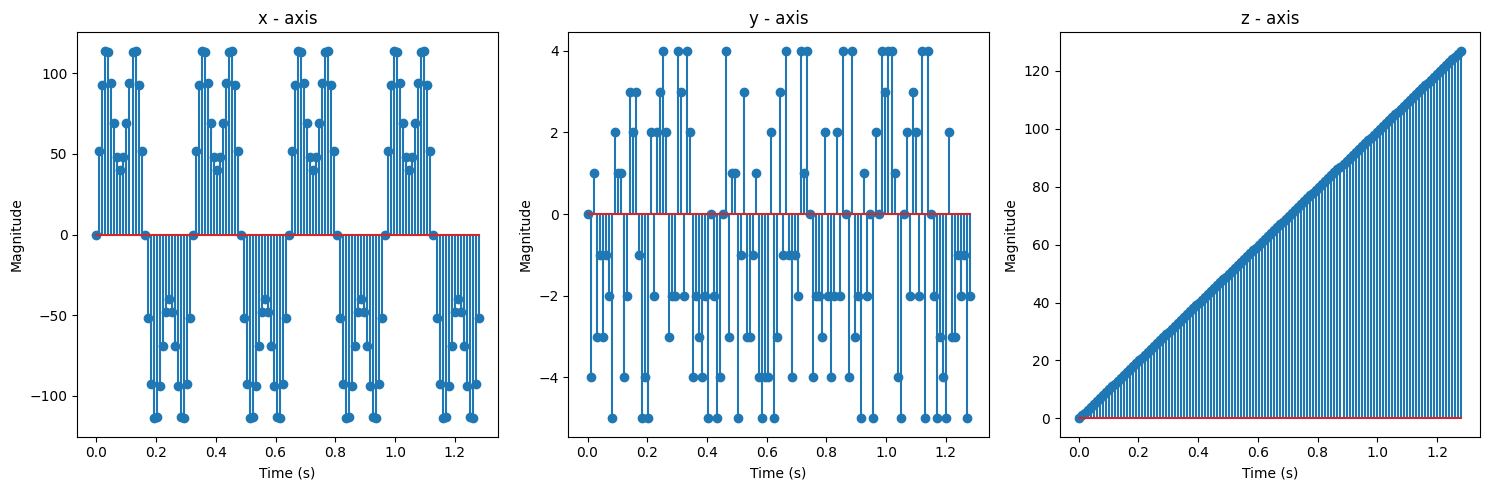

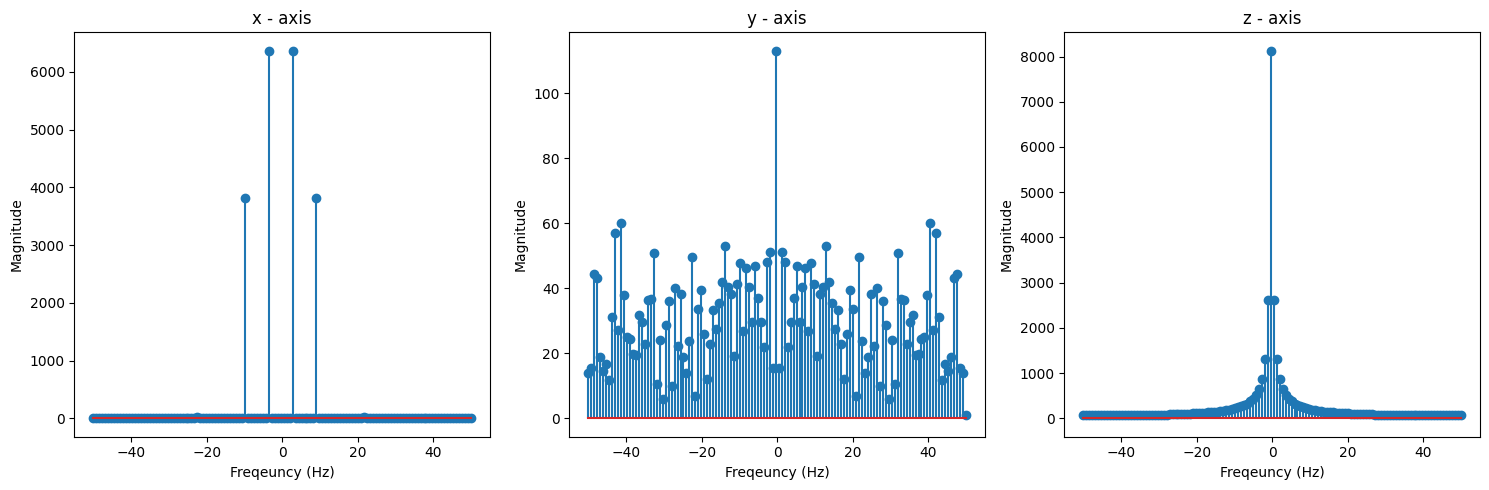

In [7]:
# x, y, z = pre_process_data(data_set_2)
x, y, z = data_set_2
print(x, y, z, sep="\n")
print()

fft_ij_x, fft_mag_x = fft_data(x)
fft_ij_y, fft_mag_y = fft_data(y)
fft_ij_z, fft_mag_z = fft_data(z)
print(fft_mag_x)
print(fft_mag_y)
print(fft_mag_z)

visualize_data(x, y, z, sampling_frequency, "time")

visualize_data(fft_mag_x, fft_mag_y, fft_mag_z, sampling_frequency, "frequency")